In [1]:
# Thanks Toby!

In [2]:
import lane_detection
import lane_following
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
vcap = cv2.VideoCapture("AUV_Vid.mkv")

In [4]:
frequency = 300
count = 0

[[4.3561643835616435, 797.2295597484276, 724, 761, 797, 1079], [1.9606741573033708, 961.5300859598854, 782, 728, 960, 1077]]
2.7042068200923475
[0, 0, 480.00208592384337, 0, 879.3798228541565, 1080]


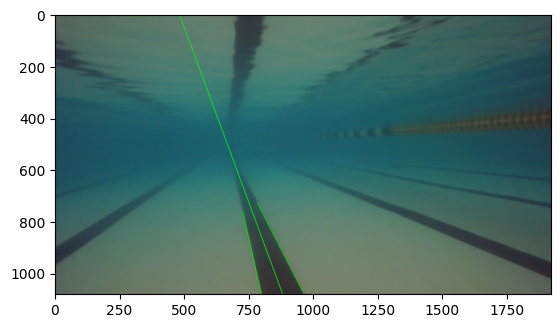

[[-2.0463917525773194, 567.5793450881612, 571, 1073, 765, 676], [6.349206349206349, 950.695, 871, 574, 934, 974]]
-6.039285782197798
[0, 0, 937.9662657430731, 0, 759.1371725440806, 1080]


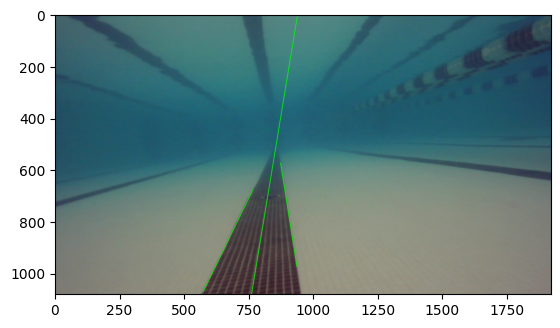

[[-0.7538994800693241, 156.34712643678162, 159, 1078, 736, 643], [-0.9340909090909091, 319.1776155717762, 362, 1040, 802, 629]]
-0.8343775595208925
[0, 0, 1532.1404228542665, 0, 237.76237100427892, 1080]


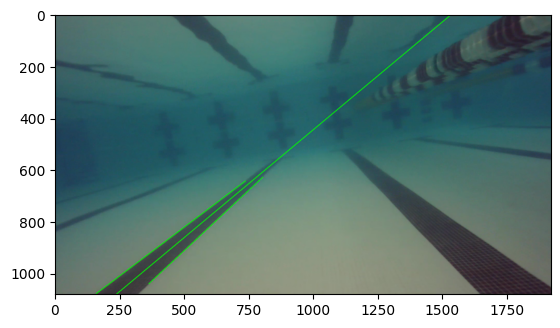

[[-1.6651785714285714, 461.39142091152814, 471, 1064, 695, 691], [-4.049382716049383, 683.564024390244, 709, 977, 790, 649]]
-2.359917056469113
[0, 0, 1030.1209254233963, 0, 572.4777226508861, 1080]


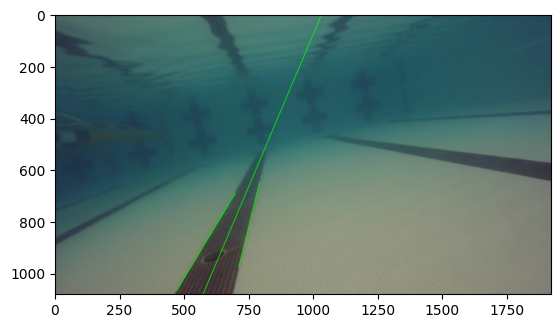

[]
[0, 0, 0, 0, 0, 0]


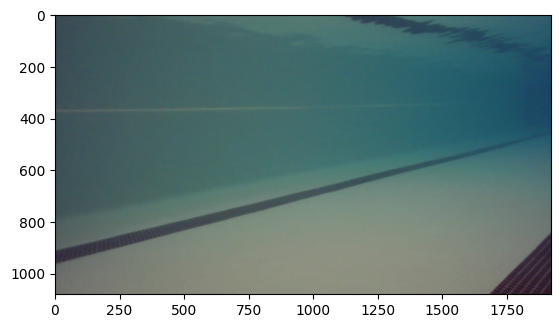

[]
[0, 0, 0, 0, 0, 0]


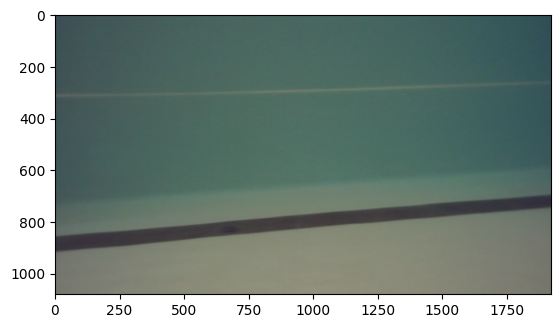

[[-1.10990990990991, 265.09902597402595, 266, 1079, 821, 463], [-2.475806451612903, 564.5960912052117, 565, 1079, 813, 465]]
-1.5327046752225766
[0, 0, 1119.4842818012605, 0, 414.8475585896188, 1080]


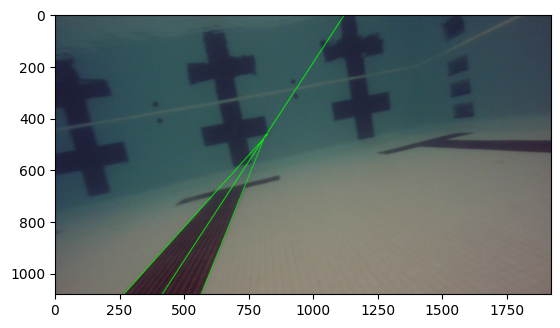

[[-0.17597471022128555, -3089.4011976047905, 968, 366, 1917, 199], [11.421052631578947, 1400.9447004608296, 1333, 304, 1371, 738]]
-0.3574570921286249
[0, 0, 2177.1133999282547, 0, -844.2282485719804, 1080]


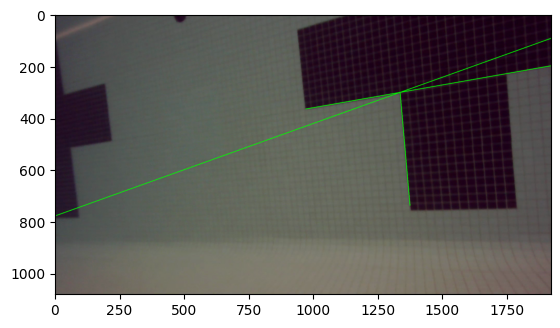

In [5]:
while True:
    ret, img = vcap.read()

    if not ret:
        break


    if count % frequency == 0:
        c = img.shape[0]/2
        lines = lane_detection.detect_lines(img, threshold1=30,threshold2=40, apertureSize=3,maxLineGap = 200, minLineLength=300)
        lanes = lane_detection.detect_lanes(lines)
        drawing = lane_detection.draw_lanes(img, lanes)
        #newimg = lane_detection.draw_lines(img, lines)


        print(lanes)
        center = lane_following.get_lane_center(lanes)
        cen = lane_following.get_center_line(center[0], center[1],img.shape[0])
        print(cen)
        plt.imshow(cv2.cvtColor(lane_following.draw_center(img, cen), cv2.COLOR_BGR2RGB))
        plt.show()
        
        #print(lane_following.recommend_direction(center[0], center[1], c))

    count += 1